In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib_inline
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import collections

In [2]:
df = pd.read_csv('D:/Code/Presidential_Election_Analysis/Crawling/소신투표/소신투표_unsmile.csv',encoding='utf-8')

In [3]:
label = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']

In [4]:
stats = []
for i in label:
    stats.append(df[i].sum())

In [5]:
plt.rcParams['font.family'] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False

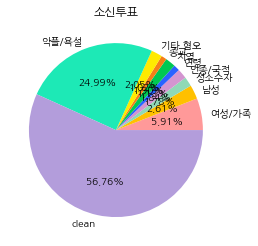

In [6]:
#wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2962FF', '#00c853', '#f57f17', '#ffea00', '#1De9B6', '#b39ddb']
plt.axis=('equal')
plt.title('소신투표')
plt.pie(stats, labels=label, autopct='%.2f%%', colors=colors)
plt.show()

In [7]:
# 카테고리별로 점수가 높은 순서대로 정렬
df_woman = df.sort_values(by='여성/가족', ascending=False).groupby('text').head(10)
df_man = df.sort_values(by='남성', ascending=False).groupby('text').head(10)
df_region = df.sort_values(by='지역', ascending=False).groupby('text').head(10)
df_queer = df.sort_values(by='성소수자', ascending=False).groupby('text').head(10)
df_religion = df.sort_values(by='종교', ascending=False).groupby('text').head(10)

In [8]:
df_woman.head(20)

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
1197,한녀들 소신투표한다고 자기 신념 버리고 울며 겨자먹기로 투표하는 여자들한테 묻어가는...,0.92,0.06,0.02,0.04,0.02,0.02,0.02,0.03,0.04,0.04
1146,심상정 안철수 소신투표 하신다는 한녀들은 이거 보고 가세요 ㅋㅋ 현실은 잔혹함 소신...,0.92,0.05,0.02,0.04,0.02,0.02,0.02,0.04,0.04,0.05
2432,방금 트렌드를 쭉 훑어 봤는데 꼴페미들은 여가부 폐지 윤석열대 이재명으로 소신투표V...,0.92,0.02,0.02,0.04,0.02,0.02,0.01,0.05,0.05,0.08
776,페미들아 소신투표 집어치우고 여성인권을 위해 찢재명 꼭 찍길 바란다 내연녀에 입에 ...,0.91,0.02,0.02,0.04,0.01,0.03,0.02,0.06,0.07,0.04
173,여자들아 소신투표 이지랄하지말고 걍 이재명뽑아라 제발 제발,0.91,0.02,0.02,0.03,0.02,0.04,0.02,0.04,0.07,0.07
3234,이런데도 #소신투표 하겠다는 입페미들은 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 페미라고도 하지말아,0.90,0.02,0.02,0.03,0.02,0.02,0.01,0.05,0.07,0.05
1073,소신투표 좋지 근데 이때까지 여자들이 정의당뽑고 여성의당 뽑은걸 보답받았냐고 이번에...,0.90,0.07,0.02,0.04,0.01,0.02,0.01,0.03,0.05,0.07
908,지금 소신투표 운운하는 한녀들 이거같음 당장 다같이 반페미정부한테 5년동안 임신기계...,0.90,0.04,0.02,0.04,0.02,0.01,0.02,0.03,0.06,0.05
778,이번 대선에서 소신투표를 하지 말아야 할 이유는 소신투표를 할때는 결과가 어떻든 내...,0.90,0.03,0.03,0.04,0.01,0.02,0.01,0.03,0.04,0.07
2332,여자들 제발 소신투표 No 표 갈라지면 여자들의 인생이 좃될 수 있습니다,0.90,0.07,0.02,0.02,0.02,0.02,0.01,0.03,0.05,0.06


In [9]:
df_religion.head(20)

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
404,아니 왜 그러는지는 알긴 알겠지만 종교 전도하듯이 예수천국 불신지옥 처럼 소신투표 ...,0.01,0.01,0.03,0.04,0.01,0.02,0.87,0.03,0.06,0.07
3100,왜냐면 그냥 없어지거든요 그냥 없는 존재 취급되는 거예요 엇 너무 익숙한데 교회 안...,0.01,0.02,0.04,0.01,0.01,0.01,0.15,0.01,0.06,0.68
1641,모르것다 소드나 맘카페에 신천지 존나 많아서 막 소신투표 하게끔 몰아붙인다던데 하 ...,0.01,0.00,0.02,0.03,0.00,0.02,0.10,0.03,0.15,0.16
1570,안철수가 휴대폰 사용 못하는 이유 폭력배 양아치 윤석열 대깨윤들의 문자폭탄 2만통 ...,0.05,0.01,0.03,0.18,0.04,0.02,0.09,0.54,0.16,0.04
752,아니쉬발 회유를 해도 설득이 될까말까 공격을 하면 어떡해요 다짜고짜 신천지 이 난리...,0.01,0.01,0.02,0.03,0.01,0.02,0.08,0.02,0.72,0.03
1500,구적폐 신적폐 양당적폐의 안철수 죽이기는 5년전이나 지금이나 똑같다 적폐에 줄선 기...,0.02,0.01,0.02,0.13,0.02,0.07,0.07,0.53,0.31,0.04
663,이재명을 소신투표 하겠냐 말 되는 소리를 해야지 마음 같아서는 이번 대선후보들 싹 ...,0.01,0.03,0.03,0.71,0.01,0.02,0.07,0.05,0.13,0.01
159,송시인이 임신 7개월었을 때 폭행해서 입원시킨 상습폭행범 배인규가 여혐이 아니라고 ...,0.01,0.02,0.05,0.09,0.00,0.04,0.06,0.04,0.03,0.17
2869,이재명도 개 민폐지 이재명이 진작에 압도적으로 이길만하게 빌드업 했어야 소신투표할사...,0.01,0.01,0.01,0.04,0.00,0.06,0.06,0.06,0.55,0.04
1108,찢빠들은 심상정 지지자들이 이재명찍으면 선거 이길수 있다고 생각하나보네 ㅋㅋㅋㅋ 팩...,0.16,0.01,0.01,0.04,0.01,0.05,0.06,0.25,0.36,0.08


In [10]:
df_man.head(20)

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
2400,한남에서 소신투표하는 한국남자강동원,0.05,0.94,0.02,0.05,0.03,0.03,0.02,0.02,0.05,0.05
2312,2번남들 부들대는게 보기 재밌긴한데 ㅋㅋ 헤테로 한남녀들의 싸움이라 뵈지도않고 모여...,0.06,0.94,0.03,0.07,0.03,0.02,0.02,0.02,0.05,0.04
942,이재명 고려하고 있는 이유는 간단함 한남충과 반대로 가기 위해서임 그들에게 제일 좆...,0.06,0.93,0.02,0.05,0.03,0.02,0.02,0.02,0.04,0.04
755,하 소신투표 할라고 진짜 맘 먹었었는데 나라가 왜 이 모양이 됐냐 눈물난다 어디 해...,0.03,0.93,0.02,0.05,0.03,0.02,0.02,0.02,0.05,0.04
863,윤석열이 당선되도 소신투표 주장하는 사람들은 왜 거의 다 한남들이냐,0.06,0.93,0.02,0.02,0.03,0.03,0.02,0.02,0.05,0.04
747,최소한 여성분들 지금의 생활을 유지하려면 찢을 뽑아야 합니다 한남들 지금 여기저기에...,0.06,0.93,0.02,0.04,0.03,0.02,0.02,0.02,0.05,0.04
301,한남충들이 여초 커뮤 들어가서 소신투표하자며 이재명 안 뽑게 선동해서 윤 되게 하려...,0.05,0.93,0.02,0.03,0.05,0.02,0.02,0.02,0.05,0.04
2499,자지새끼들 성상납준석 존나 부둥부둥해주더라 ㅋㅋㅋㅋㅋㅋㅋ 난 가세연이 이준석 성상납...,0.03,0.93,0.03,0.05,0.04,0.02,0.02,0.03,0.05,0.03
2325,난 전략맞음 입찢어져도 1번이 소신투표될순없어나한텐ㅋㅋㅋ 망할2번남들,0.03,0.92,0.03,0.05,0.03,0.03,0.01,0.02,0.05,0.04
3218,아직도 소신투표 타령하는거 솔직히 존나 짜증난다 소신투표의 결과가 여자표 무시하는거...,0.06,0.92,0.02,0.02,0.04,0.02,0.02,0.02,0.06,0.04


In [11]:
df_region.head(20)

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
3037,페미니즘을 대하는 거대양당의 태도는 전라도를 대하는 태도를 보면 거의 똑같습니다 국...,0.28,0.02,0.03,0.06,0.02,0.92,0.03,0.10,0.05,0.03
2360,소신투표하는 사람들 1일 경상도 체험시켜주고 싶다,0.01,0.02,0.02,0.02,0.01,0.86,0.01,0.02,0.05,0.09
1635,2월 27일 일 안철수 후보님 호남유세 일정 09 30 목포역 광장 전남 목포시 영...,0.02,0.02,0.02,0.03,0.01,0.82,0.02,0.02,0.03,0.34
2481,대구 사람들에게 소신 투표를 하라고 하면 누구를 찍을 거 같냐 ㅋㅋㅋㅋ 내가 대구에...,0.01,0.01,0.01,0.03,0.01,0.75,0.02,0.02,0.06,0.13
2324,선거에서 투표 집계하는 자가 뽑히면 후진국 독재 대통령 여론조사서 이길 사람 뽑으면...,0.01,0.01,0.02,0.17,0.02,0.74,0.01,0.08,0.06,0.04
738,솔직히 문국현 뽑은 후로 한번도 소신 투표 해본적 없음 그냥 항상 차악 최악은 아니...,0.01,0.01,0.01,0.02,0.01,0.72,0.01,0.02,0.08,0.19
2972,댓글중 호남에서 소신투표가 많이 나타나리라고 본다 민주당후보이면 장작개비를 세워놔도...,0.01,0.01,0.01,0.03,0.01,0.71,0.01,0.02,0.05,0.21
513,ㅎ 충청쪽이란 말이죠 하여간 이 인간들이 하는 수 없군 정치정적의 힘을 무효화하기 ...,0.01,0.01,0.01,0.02,0.01,0.57,0.01,0.03,0.28,0.09
1401,대구 민심 정권은 바뀌어야 하는데 윤석열은 아니다 싶다 #안철수 #소신투표,0.01,0.01,0.02,0.02,0.01,0.51,0.01,0.02,0.04,0.33
442,선거 망한다고 딱히 소신투표한 사람들이 미워지진 않을거같은데 솔직히 서울영남중상류층...,0.04,0.06,0.03,0.04,0.02,0.51,0.00,0.02,0.03,0.36


In [12]:
df_queer.head(20)

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
1672,퀴어 인권 개판되는거 알죠 저희는 mb랑 ㄹ혜 10년을 다시 겪고 싶지 않으니까 도...,0.02,0.01,0.81,0.02,0.01,0.02,0.01,0.04,0.08,0.10
1791,여성으로써 성소수자로써 이나 윤이나 누가 뽑혀도 개좆같고 지옥같고 모멸감 드는건 매...,0.07,0.01,0.79,0.01,0.01,0.01,0.01,0.08,0.13,0.07
1364,무지 개판 인간들은 걍 소신 투표하세요 페미니즘으로 쓰까 먹는거 이제 그만하시고 소...,0.10,0.01,0.77,0.01,0.01,0.01,0.01,0.06,0.09,0.07
1789,심 소신투표 하겠다는 사람들 코너로 몰고 그 표 앞에서 여성인권 성소수자인권 외치면...,0.07,0.01,0.76,0.01,0.01,0.02,0.01,0.11,0.07,0.08
785,윤석열이 당선되면 차별금지법커녕 장애인들의 집회는 경찰의 폭력으로 막히고 성소수자 ...,0.08,0.02,0.76,0.04,0.03,0.04,0.01,0.48,0.08,0.05
1834,지금 이 찍겠다는 사람들이 누구보다도 절박한 거 아닌가 누군 소신투표 안 하고 싶어...,0.03,0.01,0.73,0.02,0.01,0.01,0.01,0.03,0.08,0.09
2434,소신투표하고 싶다 근데 죽어도 소수자 혐오를 프레임으로 들고온 후보가 뽑히는 꼴은 ...,0.03,0.02,0.72,0.02,0.01,0.02,0.01,0.18,0.11,0.08
1822,이재명이 안되면 성소수자가 소신투표해서가 아니라 당과 후보의 자질과 전략이 부족했던...,0.02,0.01,0.70,0.01,0.01,0.01,0.02,0.04,0.07,0.12
1825,민주당 당선이 불확실할때는 전략투표하고 확실할 때는 소신투표 하라는건가 그럼 민주당...,0.03,0.01,0.66,0.01,0.01,0.02,0.01,0.04,0.10,0.13
583,사실 퀴어 여성 챙기겠다고 말만해도 소신투표로 나뉠거없이 표 받게될텐데 소신투표로 ...,0.03,0.01,0.65,0.02,0.01,0.01,0.01,0.02,0.07,0.19


In [13]:
# 0.6이상인 텍스트들만 추출
df_woman = df_woman[df_woman['여성/가족'] >= 0.6]
df_man = df_man[df_man['남성'] >= 0.6]
df_region = df_region[df_region['지역'] >= 0.6]
df_queer = df_queer[df_queer['성소수자'] >= 0.6]
df_religion = df_religion[df_religion['종교'] >= 0.6]

In [14]:
# 전체 갯수 확인
print(len(df_woman))
print(len(df_man))
print(len(df_region))
print(len(df_queer))
print(len(df_religion))

119
52
7
10
1


In [ ]:
print('여성/가족 긍정 리뷰 갯수: {}'.format(df_woman['label'].value_counts()[1]))
print('여성/가족 부정 리뷰 갯수: {}'.format(df_woman['label'].value_counts()[0]))
print('남성 긍정 리뷰 갯수: {}'.format(df_man['label'].value_counts()[1]))
print('남성 부정 리뷰 갯수: {}'.format(df_man['label'].value_counts()[0]))
print('지역 긍정 리뷰 갯수: {}'.format(df_region['label'].value_counts()[1]))
print('지역 부정 리뷰 갯수: {}'.format(df_region['label'].value_counts()[0]))
print('성소수자 긍정 리뷰 갯수: {}'.format(df_queer['label'].value_counts()[1]))
print('성소수자 부정 리뷰 갯수: {}'.format(df_queer['label'].value_counts()[0]))
print('성소수자 긍정 리뷰 갯수: {}'.format(df_religion['label'].value_counts()[1]))
print('성소수자 부정 리뷰 갯수: {}'.format(df_religion['label'].value_counts()[0]))

In [23]:
# 긍정, 부정 분포도
def posNneg(df):
    label = ['positive', 'negative']
    index =  np.arange(len(df['label']))
    value = [df['label'].value_counts()[1], df['label'].value_counts()[0]]
    value = [0, df['label'].value_counts()[0]]
    plt.bar(label, value, color=['r', 'b'], alpha=0.5)
    plt.title('Distribution of Pos and Neg', fontsize=15)
    plt.xlabel('label')
    plt.ylabel('count')
    plt.show()

In [16]:
# 백업용 저장
df_woman.to_csv('D:/Code/Presidential_Election_Analysis/Crawling/소신투표/소신투표_여성.csv', encoding='utf-8-sig',sep=',', index=False)
df_man.to_csv('D:/Code/Presidential_Election_Analysis/Crawling/소신투표/소신투표_남성.csv', encoding='utf-8-sig',sep=',', index=False)
df_region.to_csv('D:/Code/Presidential_Election_Analysis/Crawling/소신투표/소신투표_지역.csv', encoding='utf-8-sig',sep=',', index=False)
df_queer.to_csv('D:/Code/Presidential_Election_Analysis/Crawling/소신투표/소신투표_성소수자.csv', encoding='utf-8-sig',sep=',', index=False)
df_religion.to_csv('D:/Code/Presidential_Election_Analysis/Crawling/소신투표/소신투표_종교.csv', encoding='utf-8-sig',sep=',', index=False)

In [17]:
df_woman = pd.read_csv('D:/Code/Presidential_Election_Analysis/Crawling/소신투표/소신투표_여성.csv', encoding='utf-8')
df_man = pd.read_csv('D:/Code/Presidential_Election_Analysis/Crawling/소신투표/소신투표_남성.csv', encoding='utf-8')
df_region = pd.read_csv('D:/Code/Presidential_Election_Analysis/Crawling/소신투표/소신투표_지역.csv', encoding='utf-8')
df_queer = pd.read_csv('D:/Code/Presidential_Election_Analysis/Crawling/소신투표/소신투표_성소수자.csv', encoding='utf-8')
df_religion=pd.read_csv('D:/Code/Presidential_Election_Analysis/Crawling/소신투표/소신투표_종교.csv', encoding='utf-8')

In [18]:
import re

# Basic Cleaning Text Function
def CleanText(readData, Num=False, Eng=False):

    # Remove Retweets RT @user_screenname 
    text = re.sub('RT @[\w_]+: ', '', readData)
    text = re.sub('알티', '', text)
    text = re.sub('RT', '', text)

    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)

    # Remove or Replace URL 
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    
    # Remove Hashtag
    text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)

    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    
    # Remove newline
    text = text.replace('\n',' ')
    
    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+',' ',text)
    
    if Eng is True:
        # Remove English 
        text = re.sub('[a-zA-Z]' , ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())
       
    return text

In [19]:
from konlpy.tag import Mecab

In [20]:
# Preprocessing code with Mecab
#dicpath="/usr/local/lib/mecab/dic/mecab-ko-dic"
mecab = Mecab(r"C:/mecab/mecab-ko-dic") # Mecab User Dic Path

def preprocessing_mecab(readData):
    
    #### Clean text
    sentence = CleanText(readData)
    
    #### Tokenize
    morphs = mecab.pos(sentence)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)
   
    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [21]:
df_woman['tokenized'] = df_woman['text'].apply(lambda x: preprocessing_mecab(x))
df_man['tokenized'] = df_man['text'].apply(lambda x: preprocessing_mecab(x))
df_region['tokenized'] = df_region['text'].apply(lambda x: preprocessing_mecab(x))
df_queer['tokenized'] = df_queer['text'].apply(lambda x: preprocessing_mecab(x))
df_religion['tokenized'] = df_religion['text'].apply(lambda x: preprocessing_mecab(x))

In [22]:
token_woman = df_woman['tokenized']
token_man = df_man['tokenized']
token_region = df_region['tokenized']
token_queer = df_queer['tokenized']
token_religion = df_religion['tokenized']

In [26]:
# tokenizing
# stopwords list
stop_words = pd.read_csv('./한국어불용어100.txt', sep = "\t", engine='python')
stop_words = list(stop_words["word"])
stopwords = ['한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','소신', '투표', '진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거', ]
stopwords = stopwords+stop_words
stopwords.remove('여자')

In [27]:
print(stopwords)

['한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ', '소신', '투표', '진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는', '생겼', '인데', '해도', '된다', '이거', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']


In [28]:
category = [token_woman, token_man, token_region, token_queer, token_religion]

In [29]:
# 단어 빈도수 생성
def word_frequency(token):
    n_corpus = []
    for t in token:
        for j in t:
            if j not in stopwords:
                n_corpus.append(j)

    count = collections.Counter(n_corpus) 
    most = count.most_common() # 빈도 수 순으로 추출 
    x, y= [], [] 
    for word,count in most[:40]: 
        x.append(word) 
        y.append(count)
    #plt.rc('font',family='NanumGothic.ttf')
    plt.rcParams['font.family'] = "NanumGothic"
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10,10)) 
    sns.barplot(x=y,y=x)

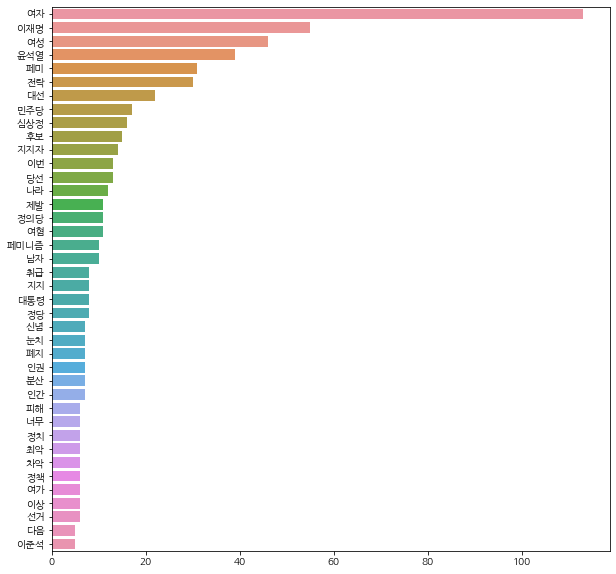

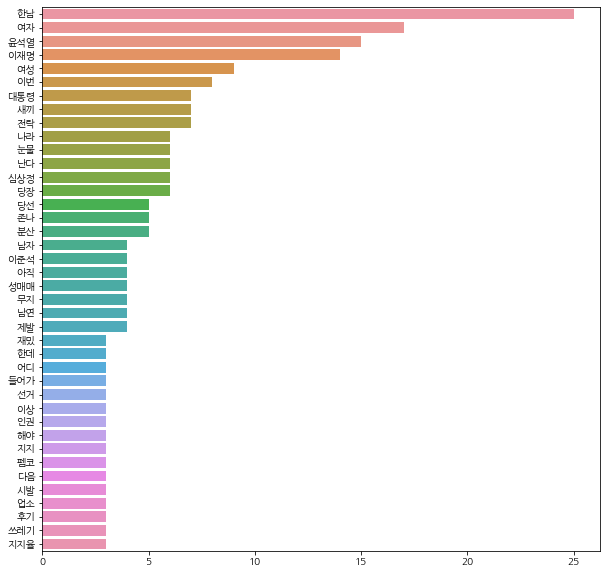

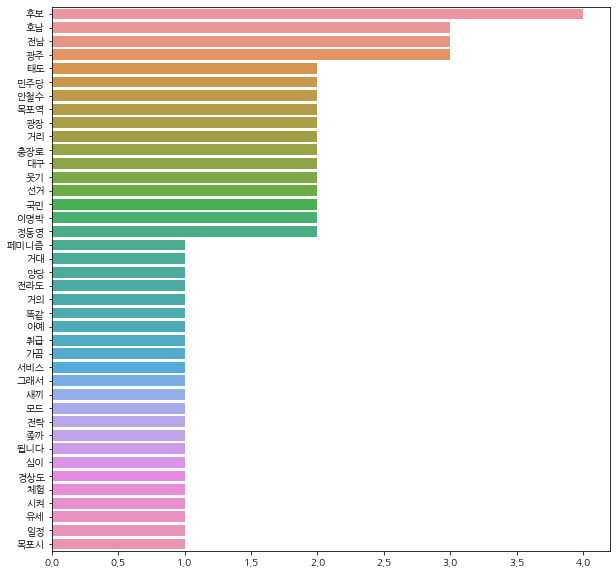

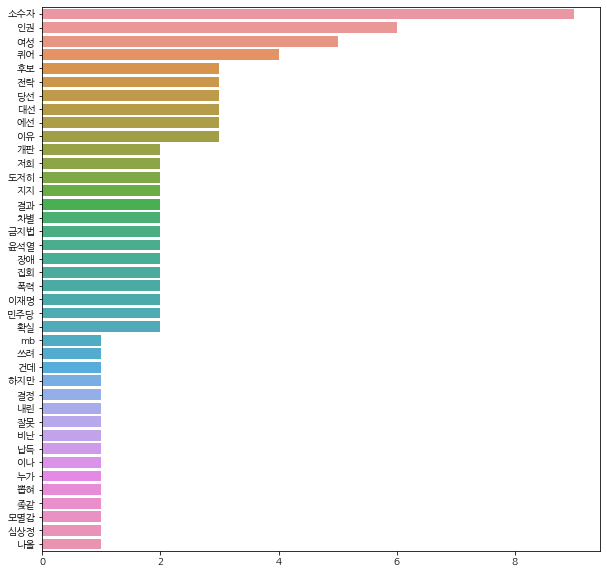

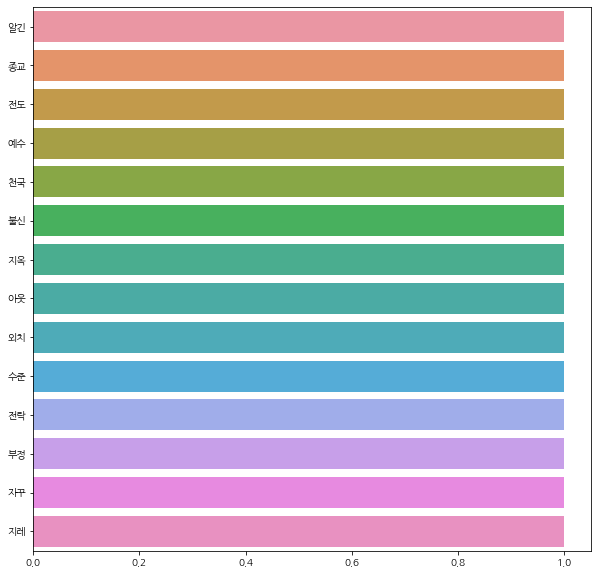

In [30]:
# 여성/가족, 남성, 지역, 성소수자, 종교
for i in category:
    word_frequency(i)

In [31]:
# 워드 클라우드 생성
def make_wordcloud(token):
    n_corpus = []
    for t in token:
        for j in t:
            if j not in stopwords:
                n_corpus.append(j)
    font_path = 'C:/Users/Erin/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf'
    wordcloud = WordCloud(font_path=font_path,
                        background_color="black",
                        stopwords=stopwords, 
                        max_words=100, 
                        # max_font_size=30,
                        width=500,
                        height=500, 
                        random_state=1,
                        scale=3).generate(' '.join(n_corpus))
    fig = plt.figure(1, figsize=(8,8)) 
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis('off')
    plt.show()

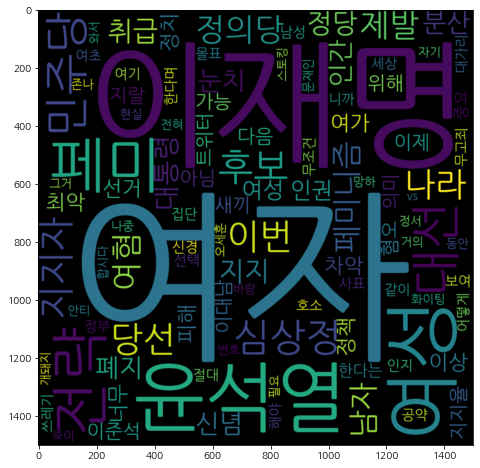

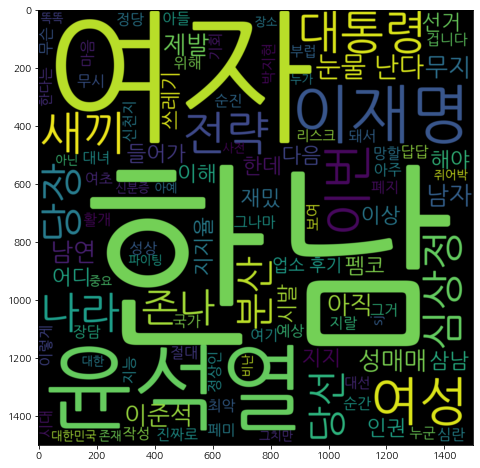

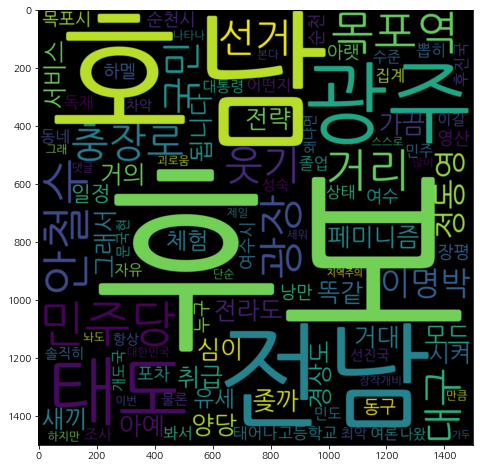

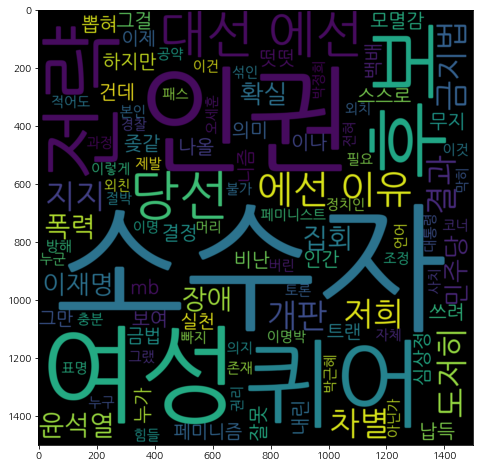

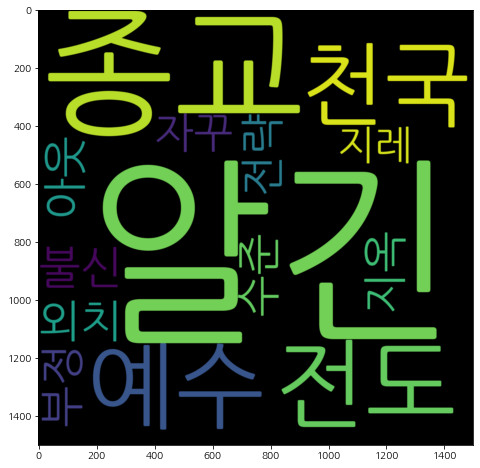

In [32]:
for i in category:
    make_wordcloud(i)